In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

### Question 1

In [2]:
data = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv', parse_dates=True)
print(data.shape)

(1494926, 21)


In [3]:
data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494926 entries, 0 to 1494925
Data columns (total 21 columns):
VendorID                 1494926 non-null int64
lpep_pickup_datetime     1494926 non-null object
Lpep_dropoff_datetime    1494926 non-null object
Store_and_fwd_flag       1494926 non-null object
RateCodeID               1494926 non-null int64
Pickup_longitude         1494926 non-null float64
Pickup_latitude          1494926 non-null float64
Dropoff_longitude        1494926 non-null float64
Dropoff_latitude         1494926 non-null float64
Passenger_count          1494926 non-null int64
Trip_distance            1494926 non-null float64
Fare_amount              1494926 non-null float64
Extra                    1494926 non-null float64
MTA_tax                  1494926 non-null float64
Tip_amount               1494926 non-null float64
Tolls_amount             1494926 non-null float64
Ehail_fee                0 non-null float64
improvement_surcharge    1494926 non-null float64
To

In [5]:
#Check how many null values
data.isnull().sum()

VendorID                       0
lpep_pickup_datetime           0
Lpep_dropoff_datetime          0
Store_and_fwd_flag             0
RateCodeID                     0
Pickup_longitude               0
Pickup_latitude                0
Dropoff_longitude              0
Dropoff_latitude               0
Passenger_count                0
Trip_distance                  0
Fare_amount                    0
Extra                          0
MTA_tax                        0
Tip_amount                     0
Tolls_amount                   0
Ehail_fee                1494926
improvement_surcharge          0
Total_amount                   0
Payment_type                   0
Trip_type                      4
dtype: int64

There is only one column has missing value which proportion is 100%， and a small missing value in Trip_type , let 's drop them.

In [6]:
data = data.drop(columns = 'Ehail_fee')
data = data.dropna()

![](http://)According to the study, the initial charge of Green Taxi in NYC is $2.5. And it's reasonable that all the fees, including fare, tax, tip, toll, surcharge, should be above zero.

In [7]:
# We can see columns of fare, tax, tip, toll, surcharge have the negative value
data.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.494922e+06,1.494922e+06,1.494922e+06,1.494922e+06,1.494922e+06,1.494922e+06,1.494922e+06,1.494922e+06,1.494922e+06,1.494922e+06,1.494922e+06,1.494922e+06,1.494922e+06,1.494922e+06,1.494922e+06,1.494922e+06,1.494922e+06
mean,1.782047e+00,1.097391e+00,-7.383084e+01,4.069114e+01,-7.383748e+01,4.069301e+01,1.370601e+00,2.968149e+00,1.254318e+01,3.512809e-01,4.866421e-01,1.235730e+00,1.231050e-01,2.920999e-01,1.503214e+01,1.540559e+00,1.022353e+00
std,4.128555e-01,6.154502e-01,2.776085e+00,1.530884e+00,2.675190e+00,1.475199e+00,1.039425e+00,3.076621e+00,1.008279e+01,3.663097e-01,8.504112e-02,2.431478e+00,8.910148e-01,5.073791e-02,1.155317e+01,5.232922e-01,1.478288e-01
min,1.000000e+00,1.000000e+00,-8.331908e+01,0.000000e+00,-8.342784e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395961e+01,4.069895e+01,-7.396782e+01,4.069878e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394536e+01,4.074674e+01,-7.394504e+01,4.074728e+01,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391748e+01,4.080255e+01,-7.391013e+01,4.079015e+01,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.317726e+01,0.000000e+00,4.279934e+01,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,3.000000e-01,5.813000e+02,5.000000e+00,2.000000e+00


In [8]:
# Filter data in order to get the positive values
data = data[(data.Total_amount >= 2.5)
            &(data.Fare_amount >= 0) 
            & (data.Extra >= 0) 
            & (data.MTA_tax >= 0) 
            & (data.Tip_amount >= 0) 
            & (data.Tolls_amount >= 0) 
            &  (data.improvement_surcharge >= 0)]

### Qusetion2:
Plot a histogram of trip distance

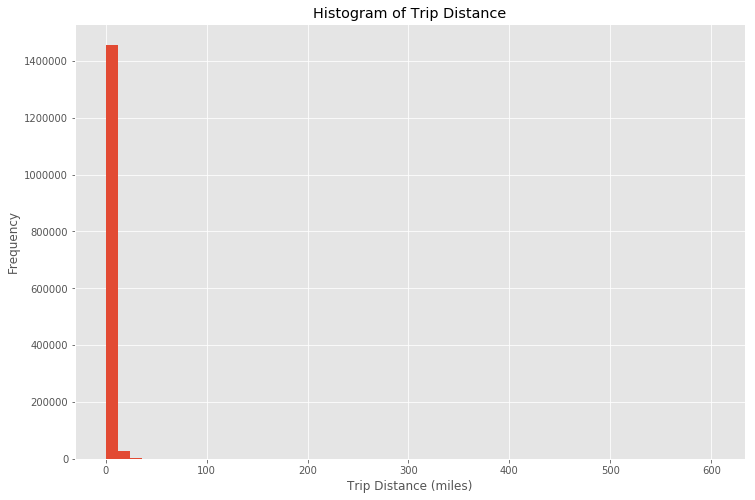

In [9]:
plt.figure(figsize=(12,8))

data['Trip_distance'].hist(bins=50)

plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Distance')

plt.show()

Seems like there are some outliers and influence us to see the distribution of the Trip Distance. Next step is to remove the outliers. I choose to use z-score to detect outliers (with zero mean and unit variance).

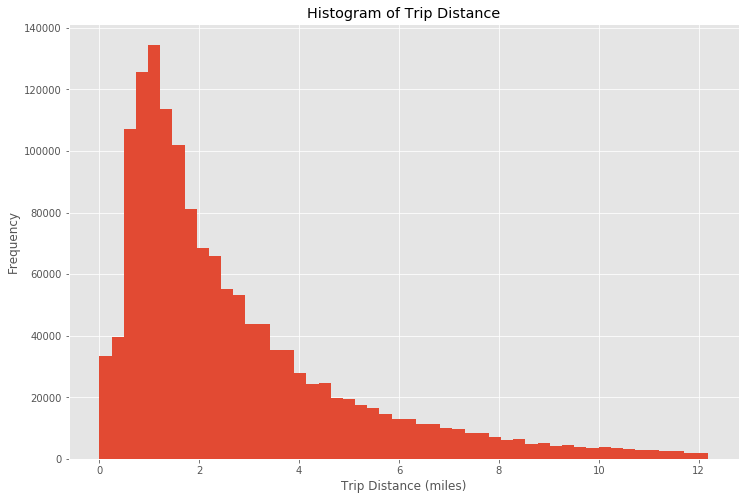

In [10]:
# Z-score = (x - mean) / std
std = data['Trip_distance'].std()
mean = data['Trip_distance'].mean()

filtered_data = data['Trip_distance'][abs(data['Trip_distance'] - mean) / std <= 3]

plt.figure(figsize=(12,8))

filtered_data.hist(bins=50)

plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Distance')

plt.show()

1.From the figure above, the distribution of Trip Distance has a positive skewness.
As the distributon is not symmetric, which means that it follows some distribution rather than random.

2.Seems like people often use green taxi for a short distance (less than 3 miles). As the numbre of miles increased, the number of frequentcy is decreased.

### Qestion 3
#### 3.1 Reporting mean and median Trip Distance group by hour of day

In [11]:
# Transform date to Datetime
data['Pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])
data['Pickup_hour'] = data['Pickup_datetime'].dt.hour

In [12]:
hour_mean = data.groupby('Pickup_hour')['Trip_distance'].mean()
hour_median = data.groupby('Pickup_hour')['Trip_distance'].median()

df = pd.concat([hour_mean, hour_median],axis =1)
df.columns = ['Mean Trip Distance','Median Trip Distance']
df.head()

,Mean Trip Distance,Median Trip Distance
Pickup_hour,,
0,3.121554,2.20
1,3.023154,2.13
2,3.053454,2.15
3,3.218797,2.21
4,3.533137,2.37


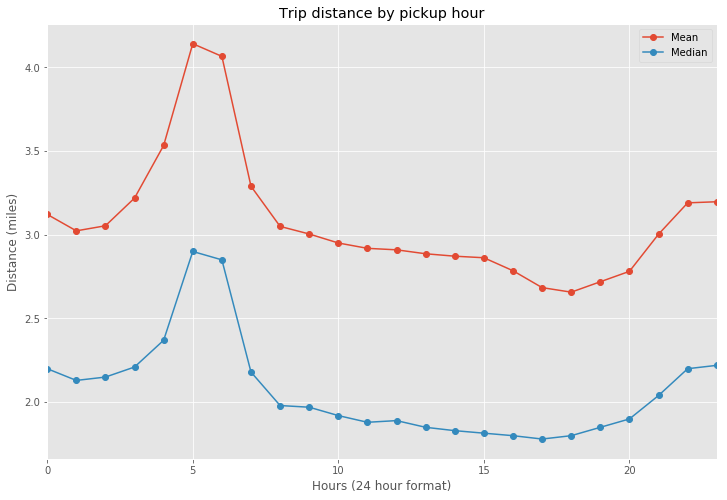

In [13]:
plt.subplots(figsize=(12,8))

plt.plot(df['Mean Trip Distance'], marker='o', label = 'Mean')
plt.plot(df['Median Trip Distance'], marker='o', label = 'Median')

plt.title('Trip distance by pickup hour')
plt.xlabel('Hours (24 hour format)')
plt.ylabel('Distance (miles)')
plt.xlim([0,23])       

plt.legend()
plt.show()

From figures above,
1. We can see that time between 4am and 7am  has a lot of long distance trip. It's the time for people to go to work in the morning. 

2. During 8am - 7pm, there is relatively few people take long distance as it's working hour.

3. During the evening, there is a little increase of the distance between 8pm and 12pm. Seems like, in big city, people have some good places to have fun when after work.

People in New york city perfer getting a long distance trip in the morning, The reason might be the work, in order to be on time, they would take the taxi.
However, after work, the distance is not same as morning,it is much less, may be people choose anthoer transportations, like subway, go back home and also it can save a lot of money.





### 3.2 Analysis for Airport group by hour
RateCodeID is the rate code in effect at the end of the trip.JFK and Newark airports have RateCodeID 2 and 3 respectively. So, RateCodeID can also be used to find trips that originate or terminate at airport. The mean trip_distance and Total_amount has been calculated for each hour of day for airport trips.

In [14]:
df_airport = data[(data.RateCodeID == 2)|(data.RateCodeID == 3)]
df_airport = df_airport[['Pickup_hour','Trip_distance','Total_amount']]
df_airport.head()

,Pickup_hour,Trip_distance,Total_amount
31,0,0.00,52.8
146,0,0.00,52.8
902,0,0.03,52.8
1374,1,0.12,52.8
1459,1,0.02,52.8


In [15]:
# Number of transportation is 5390
df_airport.shape

(5390, 3)

In [16]:
# Group by hour
df_airport_grouped = df_airport.groupby('Pickup_hour',as_index=False)[['Trip_distance', 'Total_amount']].mean()
df_airport_grouped.head()

,Pickup_hour,Trip_distance,Total_amount
0,0,1.888542,50.316667
1,1,2.624459,45.577703
2,2,4.150000,52.473175
3,3,9.362651,58.614819
4,4,12.137068,62.639398


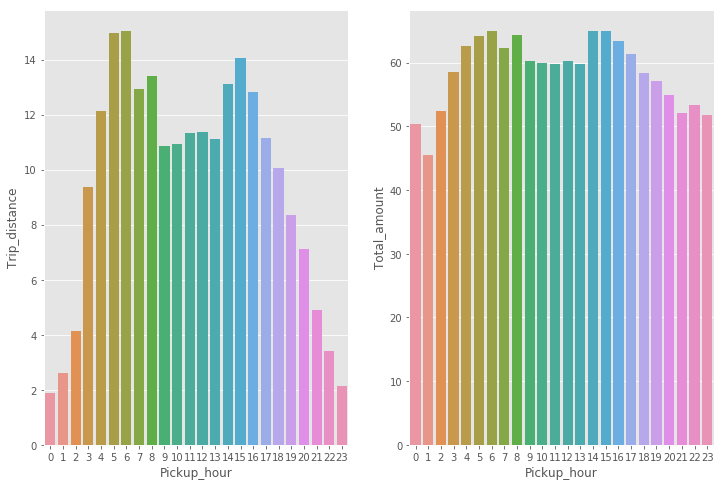

In [17]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.barplot(x='Pickup_hour', y='Trip_distance', data=df_airport_grouped)
plt.subplot(1,2,2)
sns.barplot(x='Pickup_hour', y='Total_amount', data=df_airport_grouped)
plt.show()

From the figure above,
1. The distance is proportional to fare. 
2. Also the cost per mile during evening (6pm - 3am) is higher than daytime.
3. People often have a long trip to the airport in 4am-5am and 2pm - 4pm.
 

For taix driver, if some of them are willing to get long trip work, they can get more money at 4am-5am and 2pm - 4pm.

### 3.3 Fare amount comparison between airport transportations and non-airport transportations
We also can compare the amount of fare between the airport transportations and normal transportations

In [18]:
df_non_airport = data[(data.RateCodeID != 2)|(data.RateCodeID != 3)]
df_non_airport = df_non_airport[['Pickup_hour','Trip_distance','Total_amount']]

non_airport_grouped = df_non_airport.groupby('Pickup_hour',as_index=False)[['Trip_distance', 'Total_amount']].mean()
non_airport_grouped.head()

,Pickup_hour,Trip_distance,Total_amount
0,0,3.121554,15.134308
1,1,3.023154,14.591781
2,2,3.053454,14.566862
3,3,3.218797,14.943336
4,4,3.533137,15.873773


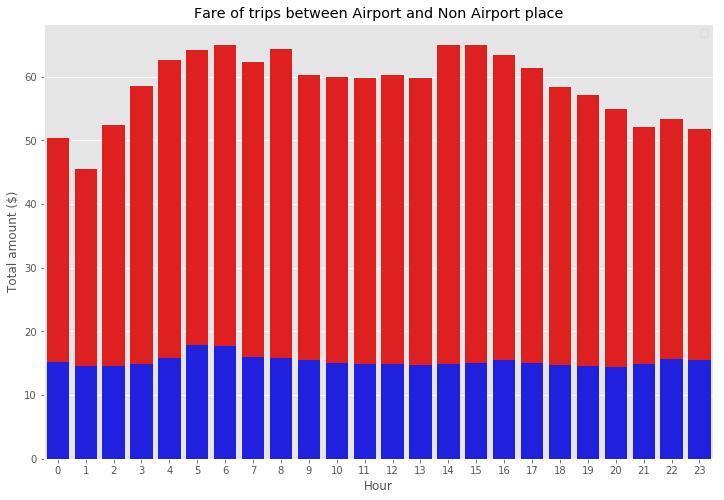

In [19]:
plt.figure(figsize=(12,8))

#Red for airport transportations
sns.barplot(x='Pickup_hour', y='Total_amount', data=df_airport_grouped, color = 'r')

# Bule for normal transportations
sns.barplot(x='Pickup_hour', y='Total_amount', data=non_airport_grouped, color = 'blue')

plt.title('Fare of trips between Airport and Non Airport place')

plt.xlabel('Hour')

plt.ylabel('Total amount ($)')
plt.legend()
plt.show()

From figure above,

Compare the fare of normal place and Airport, it is not superising that go to Airport can get higher fare (more than 40 $) 

than normal (less than 20$), since Airport is far away from the city.


### Question 4
Before building the model, let's do some preprocessing and feature engineering before fit into the model

In [20]:
# Create a new feature as we want to get some insight from tips

data['Percentage_tips'] = (data['Tip_amount'] / data['Total_amount'])

#Check if there has some negative percentage
data[data['Percentage_tips'] < 0]

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,Pickup_datetime,Pickup_hour,Percentage_tips


In [21]:
print("Max percentage of tips is:", max(data['Percentage_tips']))
print("Min percentage of tips is:", min(data['Percentage_tips']))

Max percentage of tips is: 1.0
Min percentage of tips is: 0.0


Wow, Max percentage of tips can be reached to 100%, seems like some people very generous. For a taxi driver, it is very luck to have a passager like this.

In [22]:
# Check the fare amount
print("Max fare amount tips is:", max(data['Total_amount']))
print("Min fare amount tips is:", min(data['Total_amount']))

Max fare amount tips is: 581.3
Min fare amount tips is: 2.5


The min fare is reasonable as 2.5$ is the base price.

 581.3$ is too expensive, I'm very curious how many distance the passager take. Let's check it.

In [23]:
# Check how many distance the passager take, and how much tip give to the driver
data.loc[(data.Total_amount>400),['Trip_distance', 'Tip_amount']]

,Trip_distance,Tip_amount
16195,0.00,80.00
16243,0.00,80.00
140267,0.00,0.00
159188,0.00,0.00
172150,69.27,80.16
202704,89.15,0.00
345348,11.67,0.00
365258,0.00,0.00
375079,94.38,0.00
435207,16.78,0.00


Here it is, the distance is not recorded. Maybe the taxi drive and passager reach an agreement with a price instead of using meter. It's also very common in life. And most of the 0 records of distance don't have the tips.

Therefore,in order to get a generalized model, I decide to drop these kind of cases and only use the samples with more than 1 mile distance 
I decided to model only trips having at leas 1 mile in record and fare at most 150 dollars and at least 10 dollars

In [24]:
# remove distance 0 records
data = data.loc[(data.Trip_distance)>=1,:]

#### Exploratory Data Analysis
Visualize the data to help understand trip patterns

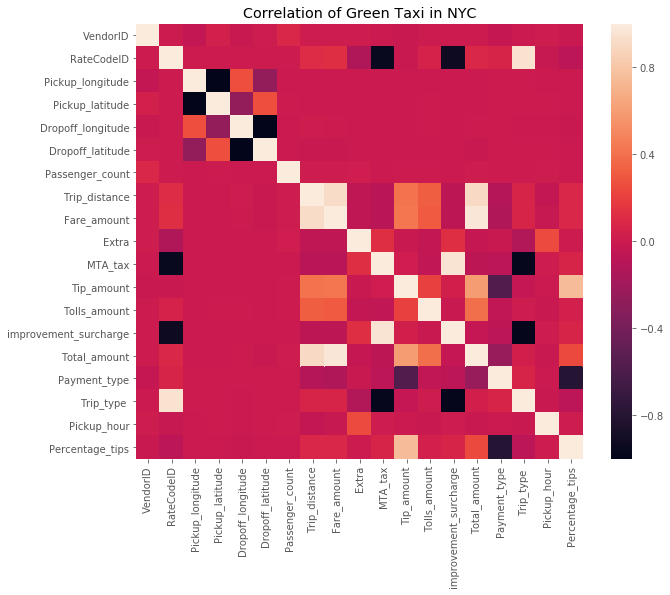

In [25]:
corr = data.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr)

plt.title('Correlation of Green Taxi in NYC')
plt.show()

From the heat map, we can see Percentage_tips has a strong correlation with Payment_type. I want to see more detail in both of them.

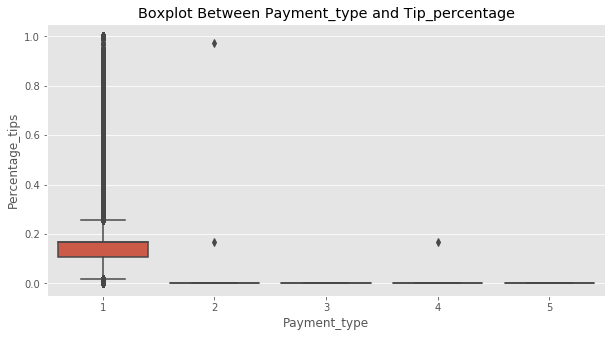

In [26]:
# Boxplot can help us to see the relationship in each category of payment type
plt.figure(figsize = (10,5))

sns.boxplot(x='Payment_type', y='Percentage_tips', 
            data=data).set_title("Boxplot Between Payment_type and Tip_percentage")
plt.show()

From boxplot we can see, the first class of Payment_type have more change to get tips, the type of first class in Payment_type is Credit card.

### Building model
Build a multiple regression model on Percentage_tips 

In [27]:
# Make a copy from original data
new_df = data.copy()

# in order to call columns easier, we should rename the 'Trip_type '
new_df.rename(columns={"Trip_type ": "Trip_type"}, inplace=True)
y = data.Percentage_tips
new_df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,Pickup_datetime,Pickup_hour,Percentage_tips
5,2,2015-09-01 00:00:39,2015-09-01 00:05:20,N,1,-73.945297,40.808186,-73.937668,40.821198,1,...,0.5,1.36,0.0,0.3,8.16,1,1.0,2015-09-01 00:00:39,0,0.166667
6,2,2015-09-01 00:00:52,2015-09-01 00:05:50,N,1,-73.890877,40.746426,-73.876923,40.756306,1,...,0.5,0.00,0.0,0.3,7.80,1,1.0,2015-09-01 00:00:52,0,0.000000
8,2,2015-09-01 00:02:36,2015-09-01 00:07:20,N,1,-73.963150,40.693829,-73.956787,40.680531,1,...,0.5,1.46,0.0,0.3,8.76,1,1.0,2015-09-01 00:02:36,0,0.166667
12,2,2015-09-01 00:03:06,2015-09-01 00:07:40,N,1,-73.941650,40.818295,-73.950928,40.826031,1,...,0.5,0.00,0.0,0.3,6.80,2,1.0,2015-09-01 00:03:06,0,0.000000
15,2,2015-09-01 00:00:58,2015-09-01 00:07:54,N,1,-73.904053,40.878708,-73.896965,40.901131,1,...,0.5,0.00,0.0,0.3,8.80,2,1.0,2015-09-01 00:00:58,0,0.000000


In [28]:
X_training, X_testing, y_training, y_testing = train_test_split(new_df, y, test_size=0.3, random_state=42)

In [29]:
#Build a multiple regression model on Percentage_tips 
reg = smf.ols(formula = "Percentage_tips~C(Store_and_fwd_flag)+C(RateCodeID)+Pickup_longitude+Pickup_latitude+Dropoff_longitude+Dropoff_latitude+Passenger_count+Trip_distance+Fare_amount+Extra+MTA_tax+Tip_amount+Tolls_amount+improvement_surcharge+Total_amount+C(Payment_type)+C(Trip_type)+Pickup_hour", data = X_training).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Percentage_tips   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                 1.511e+05
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        00:41:26   Log-Likelihood:             1.5538e+06
No. Observations:              821190   AIC:                        -3.108e+06
Df Residuals:                  821164   BIC:                        -3.107e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.1223      0.004     31.513      0.000       0.115       0.130
C(Store_and_fwd_flag)[T.Y]     0.0006      0.001      1.041      0.298      -0.000       0.002
C(RateCodeID)[T.2]            -0.0093      0.001    -10.390      0.000      -0.011      -0.008
C(RateCodeID)[T.3]            -0.0240      0.003     -6.965      0.000      -0.031      -0.017
C(RateCodeID)[T.4]             0.0209      0.001     14.309      0.000       0.018       0.024
C(RateCodeID)[T.5]            -0.0024      0.002     -1.500      0.134      -0.006       0.001
C(RateCodeID)[T.6]            -0.0176      0.013     -1.361      0.174      -0.043       0.008
C(Payment_type)[T.2]          -0.0868      0.000   -844.248      0.000      -0.087      -0.087
C(Payment_type)[T.3]          -0.0845      0.001    -89.721      0.000      -0.086      -0.083
C(Payment_type)[T.4]          -0.0856      0.001    -94.627      0.000      -0.087      -0.084
C(Payment_type)[T.5]          -0.0745      0.007    -10.808      0.000      -0.088      -0.061
C(Trip_type)[T.2.0]           -0.0040      0.003     -1.305      0.192      -0.010       0.002
Pickup_longitude              -0.0120      0.001    -22.132      0.000      -0.013      -0.011
Pickup_latitude               -0.0216      0.001    -22.062      0.000      -0.024      -0.020
Dropoff_longitude             -0.0179      0.001    -33.542      0.000      -0.019      -0.017
Dropoff_latitude              -0.0326      0.001    -33.687      0.000      -0.034      -0.031
Passenger_count                0.0002   3.86e-05      4.733      0.000       0.000       0.000
Trip_distance                 -0.0004   3.06e-05    -12.823      0.000      -0.000      -0.000
Fare_amount                   -0.0039      0.002     -2.558      0.011      -0.007      -0.001
Extra                         -0.0036      0.002     -2.366      0.018      -0.007      -0.001
MTA_tax                       -0.0112      0.006     -1.806      0.071      -0.023       0.001
Tip_amount                     0.0180      0.002     11.875      0.000       0.015       0.021
Tolls_amount                  -0.0043      0.002     -2.843      0.004      -0.007      -0.001
improvement_surcharge         -0.0122      0.006     -2.068      0.039      -0.024      -0.001
Total_amount                   0.0020      0.002      1.345      0.179      -0.001       0.005
Pickup_hour                 4.467e-05   6.06e-06      7.377      0.000    3.28e-05    5.65e-05
==============================================================================
Omnibus:                   667597.385   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        794008054.024
Skew:                          -2.609   Prob(JB):                         0.00
Kurtosis:   

#### Interpretation
The R square of linear regression is 0.821 which means our model performance is great.

1. C(Payment_type)[T.2], which Payment Type is credit card, has a large value -844.248. It means that if we don't use credit card to pay fare, the percentage of tip will decrease 8.68%

2. The location of Pick-up and drop-up have a high t values, which means they have a great important part of percentage of tip. That make sense, there are different people living in different places, different people would pay different tip.

3. t value of Trip_distance is -12.823 which also has a great influence of percentage of tip. For every mile decrease, the percentage of tip will decrease 0.04%


In [30]:
pred = reg.predict(X_testing)

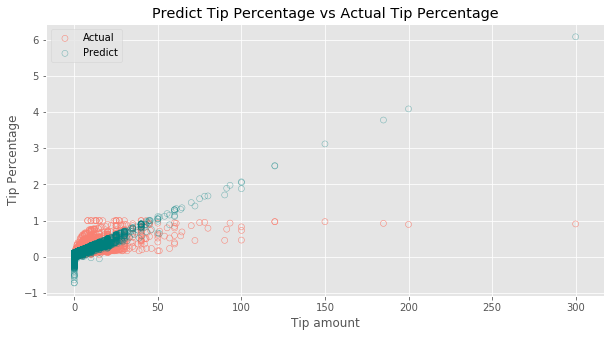

In [31]:

#Set figure size
plt.figure(figsize= (10,5))
#Make a scatter plot between predict tip percentage and actual tip percentage
plt.scatter(X_testing.Tip_amount.values, X_testing.Percentage_tips.values, facecolors='none', 
            edgecolors = 'salmon', label = "Actual")
plt.scatter(X_testing.Tip_amount.values, pred, facecolors='none', edgecolors='teal', 
            label = "Predict", alpha = 0.5)
#Set title
plt.title('Predict Tip Percentage vs Actual Tip Percentage')
#Set xlabel
plt.xlabel('Tip amount')
#Set ylabel
plt.ylabel('Tip Percentage')
#Set legend
plt.legend(loc = 2)
plt.show()

Seems great. Because we use a linear model, the prediction is linear. In the real world, the linear relationship is impossible.

### Question 5
Both of two options have been done in Question 2 and Question 4